# Cab Data Analysis, Visualization and Insight Creation Project

## Preparing the datasets

### Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8-dark')

import warnings 
warnings.filterwarnings('ignore')

In [2]:
city=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\City.csv")

In [3]:
customer=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\Customer_ID.csv")

In [4]:
taxi=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\Taxi_Data.csv")

In [5]:
transaction=pd.read_csv(r"C:\Users\Rano's PC\Machine\github_repo_cloned\cab_data_analysis\Transaction_ID.csv")

In [6]:
city.head()

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"
2,LOS ANGELES CA,"1,595,037","144,132"
3,MIAMI FL,"1,339,155","17,675"
4,SILICON VALLEY,"1,177,609","27,247"


In [7]:
customer.head()

,Customer ID,Gender,Age,Income (USD/Month)
0,29290,Male,28,10813
1,27703,Male,27,9237
2,28712,Male,53,11242
3,28020,Male,23,23327
4,27182,Male,33,8536


In [8]:
taxi.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip
0,10000011,42377,Pink Cab,ATLANTA GA,30.45,370.95,313.635
1,10000012,42375,Pink Cab,ATLANTA GA,28.62,358.52,334.854
2,10000013,42371,Pink Cab,ATLANTA GA,9.04,125.20,97.632
3,10000014,42376,Pink Cab,ATLANTA GA,33.17,377.40,351.602
4,10000015,42372,Pink Cab,ATLANTA GA,8.73,114.62,97.776


In [9]:
transaction.head()

,Transaction ID,Customer ID,Payment_Mode
0,10000011,29290,Card
1,10000012,27703,Card
2,10000013,28712,Cash
3,10000014,28020,Cash
4,10000015,27182,Card


In [10]:
taxi['Date of Travel']

0         42377
1         42375
2         42371
3         42376
4         42372
          ...  
359387    43108
359388    43104
359389    43105
359390    43105
359391    43102
Name: Date of Travel, Length: 359392, dtype: int64

In [11]:
taxi['Date of Travel']=pd.to_datetime('1899-12-30') + pd.to_timedelta(taxi['Date of Travel'], unit='D')

In [12]:
sets={'taxi':taxi,
'transaction':transaction,
'city':city,
'customer':customer}

In [13]:
for key,value in sets.items():
    print(f"{key}: {value.shape[0]}")

taxi: 359392
transaction: 440098
city: 20
customer: 49171


In [14]:
for key,value in sets.items():
    print(f"{key}: {value.duplicated().sum()}")

taxi: 0
transaction: 0
city: 0
customer: 0


In [15]:
taxi['Transaction ID'].nunique()

359392

In [16]:
transaction['Transaction ID'].nunique()

440098

In [17]:
print("Unique transaction IDs in taxi:", taxi['Transaction ID'].nunique())
print("Unique transaction IDs in transaction:", transaction['Transaction ID'].nunique())

Unique transaction IDs in taxi: 359392
Unique transaction IDs in transaction: 440098


In [18]:
extra_in_transaction = set(transaction['Transaction ID']) - set(taxi['Transaction ID'])
print("Transaction IDs in `transaction` but NOT in `taxi`:", len(extra_in_transaction))

Transaction IDs in `transaction` but NOT in `taxi`: 80706


In [19]:
extra_in_taxi = set(taxi['Transaction ID']) - set(transaction['Transaction ID'])
print("Transaction IDs in `taxi` but NOT in `transaction`:", len(extra_in_taxi))

Transaction IDs in `taxi` but NOT in `transaction`: 0


In [20]:
list(extra_in_transaction)[:10]  # preview 10 IDs

[10055975,
 10055976,
 10055977,
 10055978,
 10055979,
 10055980,
 10055981,
 10055982,
 10055983,
 10055984]

In [21]:
list(extra_in_taxi)[:10]

[]

In [22]:
transaction[transaction['Transaction ID']==10055975]

,Transaction ID,Customer ID,Payment_Mode
55964,10055975,44860,Card


In [23]:
taxi[taxi['Transaction ID']==10055975]

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip


As we can see there is some issue with the data, there are transactions, but no details about taxi...maybe that is a data consistency issue

transaction.transactionID -> taxi.transactionID

transaction.customerID -> customer.customerID

taxi.city -> city.city

### Merging the data so that there is only 1 main data source file

In [24]:
temp_data_1=pd.merge(taxi,transaction,on='Transaction ID',how='left')

In [25]:
temp_data_1.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card


In [26]:
taxi.shape

(359392, 7)

In [27]:
transaction.shape

(440098, 3)

In [28]:
temp_data_1.shape

(359392, 9)

In [29]:
temp_data_1.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
Distance Travelled(KM)    0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
dtype: int64

In [30]:
data=pd.merge(temp_data_1,customer,on='Customer ID',how='left')

In [31]:
data.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [32]:
data.shape

(359392, 12)

In [33]:
data.isnull().sum()

Transaction ID            0
Date of Travel            0
Company                   0
City                      0
Distance Travelled(KM)    0
Price Charged             0
Cost of Trip              0
Customer ID               0
Payment_Mode              0
Gender                    0
Age                       0
Income (USD/Month)        0
dtype: int64

### Basic information about the cities as we are not using in our main data frame for data consistency issue

In [34]:
city.shape

(20, 3)

In [35]:
city.head(2)

,City,Population,Users
0,NEW YORK NY,"8,405,837","302,149"
1,CHICAGO IL,"1,955,130","164,468"


In [36]:
city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   City        20 non-null     object
 1   Population  20 non-null     object
 2   Users       20 non-null     object
dtypes: object(3)
memory usage: 612.0+ bytes


In [37]:
city['Population']=city['Population'].str.replace(",","").astype(int)
city['Users']=city['Users'].str.replace(",","").astype(int)

In [38]:
city[['City','Users']].sort_values(by='Users',ascending=False).head(3)

,City,Users
0,NEW YORK NY,302149
14,SAN FRANCISCO CA,213609
1,CHICAGO IL,164468


<Axes: ylabel='City'>

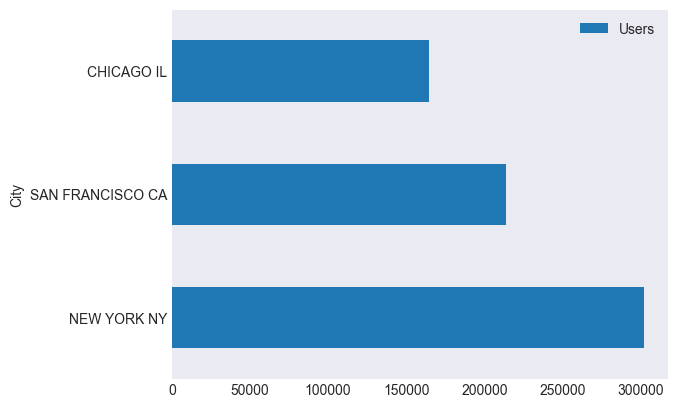

In [39]:
city[['City','Users']].sort_values(by='Users',ascending=False).head(3).set_index('City').plot(kind='barh')

These are the top 3 cities with the most users

In [40]:
city['percent user city']=round(city['Users']/city['Population']*100,2)

In [41]:
city[['City','percent user city']].sort_values(by='percent user city',ascending=False).head(3)

,City,percent user city
14,SAN FRANCISCO CA,33.93
19,BOSTON MA,32.14
17,WASHINGTON DC,30.32


<Axes: ylabel='City'>

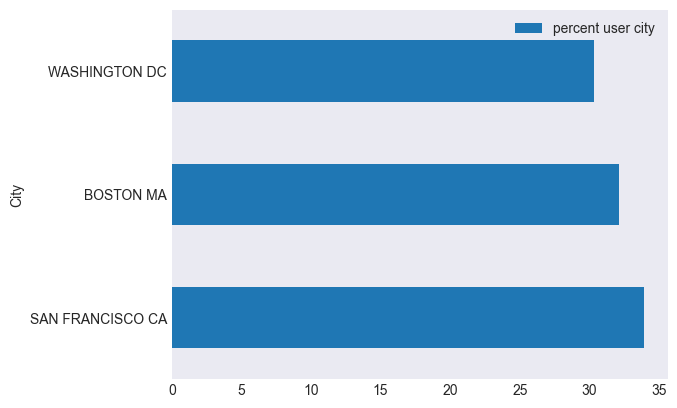

In [42]:
city[['City','percent user city']].sort_values(by='percent user city',ascending=False).head(3).set_index('City').plot(kind='barh')

As we can see, most of the users are from NYC,San Francisco and Chicago...but that is becuase the population of those cities are the highest, but if we follow the actual proportion and users, we can say that San Francisco, Boston and Washington DC have the highest user base relative to their population

- So the Engagement rate is the highest in **San Francisco, Boston and Washington DC**

### Basic information about the data

In [43]:
data.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Transaction ID          359392 non-null  int64         
 1   Date of Travel          359392 non-null  datetime64[ns]
 2   Company                 359392 non-null  object        
 3   City                    359392 non-null  object        
 4   Distance Travelled(KM)  359392 non-null  float64       
 5   Price Charged           359392 non-null  float64       
 6   Cost of Trip            359392 non-null  float64       
 7   Customer ID             359392 non-null  int64         
 8   Payment_Mode            359392 non-null  object        
 9   Gender                  359392 non-null  object        
 10  Age                     359392 non-null  int64         
 11  Income (USD/Month)      359392 non-null  int64         
dtypes: datetime64[ns](1), float64(

In [45]:
data.duplicated().sum()

0

In [46]:
data.describe(include='object')

,Company,City,Payment_Mode,Gender
count,359392,359392,359392,359392
unique,2,19,2,2
top,Yellow Cab,NEW YORK NY,Card,Male
freq,274681,99885,215504,205912


In [47]:
data.describe(include='number')

,Transaction ID,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Age,Income (USD/Month)
count,3.593920e+05,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000
mean,1.022076e+07,22.567254,423.443311,286.190113,19191.652115,35.336705,15048.822937
std,1.268058e+05,12.233526,274.378911,157.993661,21012.412463,12.594234,7969.409482
min,1.000001e+07,1.900000,15.600000,19.000000,1.000000,18.000000,2000.000000
25%,1.011081e+07,12.000000,206.437500,151.200000,2705.000000,25.000000,8424.000000
50%,1.022104e+07,22.440000,386.360000,282.480000,7459.000000,33.000000,14685.000000
75%,1.033094e+07,32.960000,583.660000,413.683200,36078.000000,42.000000,21035.000000
max,1.044011e+07,48.000000,2048.030000,691.200000,60000.000000,65.000000,35000.000000


In [48]:
data.head()

,Transaction ID,Date of Travel,Company,City,Distance Travelled(KM),Price Charged,Cost of Trip,Customer ID,Payment_Mode,Gender,Age,Income (USD/Month)
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


### Some feature engineering before starting the analysis of the data

In [49]:
data.columns=data.columns.str.lower()

In [50]:
data.rename(columns={'date of travel':'date','distance travelled(km)':'distance','price charged':'price','cost of trip':'cost',
'payment_mode':'payment mode','income (usd/month)':'income'},inplace=True)

In [51]:
data.head()

,transaction id,date,company,city,distance,price,cost,customer id,payment mode,gender,age,income
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   transaction id  359392 non-null  int64         
 1   date            359392 non-null  datetime64[ns]
 2   company         359392 non-null  object        
 3   city            359392 non-null  object        
 4   distance        359392 non-null  float64       
 5   price           359392 non-null  float64       
 6   cost            359392 non-null  float64       
 7   customer id     359392 non-null  int64         
 8   payment mode    359392 non-null  object        
 9   gender          359392 non-null  object        
 10  age             359392 non-null  int64         
 11  income          359392 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(4), object(4)
memory usage: 32.9+ MB


In [53]:
data['transaction id']=data['transaction id'].astype(str)

In [54]:
data['customer id']=data['customer id'].astype(str)

In [55]:
data['year']=data['date'].dt.year

In [56]:
data['month']=data['date'].dt.month

In [57]:
data['day']=data['date'].dt.day

In [58]:
data['day name']=data['date'].dt.day_name()

In [59]:
data.head()

,transaction id,date,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name
0,10000011,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday
1,10000012,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday
2,10000013,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday
3,10000014,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday
4,10000015,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday


In [60]:
data['profit']=data['price']-data['cost']

In [61]:
data.drop(columns=['date'],inplace=True)

In [62]:
data.head()

,transaction id,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name,profit
0,10000011,Pink Cab,ATLANTA GA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday,57.315
1,10000012,Pink Cab,ATLANTA GA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday,23.666
2,10000013,Pink Cab,ATLANTA GA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday,27.568
3,10000014,Pink Cab,ATLANTA GA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday,25.798
4,10000015,Pink Cab,ATLANTA GA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday,16.844


In [63]:
data['company']=data['company'].str.replace('Cab',"")

In [64]:
data['city'].value_counts()

city
NEW YORK NY       99885
CHICAGO IL        56625
LOS ANGELES CA    48033
WASHINGTON DC     43737
BOSTON MA         29692
SAN DIEGO CA      20488
SILICON VALLEY     8519
SEATTLE WA         7997
ATLANTA GA         7557
DALLAS TX          7017
MIAMI FL           6454
AUSTIN TX          4896
ORANGE COUNTY      3982
DENVER CO          3825
NASHVILLE TN       3010
SACRAMENTO CA      2367
PHOENIX AZ         2064
TUCSON AZ          1931
PITTSBURGH PA      1313
Name: count, dtype: int64

In [65]:
# Only split if last part is a valid US state abbreviation
us_states = set(['NY', 'IL', 'CA', 'DC', 'MA', 'WA', 'TX', 'AZ', 'PA', 'FL', 'GA', 'CO', 'TN'])

def smart_split(location):
    parts = location.rsplit(' ', 1)
    if len(parts) == 2 and parts[1] in us_states:
        return pd.Series({'city': parts[0], 'state': parts[1]})
    else:
        return pd.Series({'city': location, 'state': 'N/A'})

In [66]:
data[['city', 'state']] = data['city'].apply(smart_split)

In [67]:
data['state'].isnull().sum()

0

In [68]:
data['city'].value_counts()

city
NEW YORK          99885
CHICAGO           56625
LOS ANGELES       48033
WASHINGTON        43737
BOSTON            29692
SAN DIEGO         20488
SILICON VALLEY     8519
SEATTLE            7997
ATLANTA            7557
DALLAS             7017
MIAMI              6454
AUSTIN             4896
ORANGE COUNTY      3982
DENVER             3825
NASHVILLE          3010
SACRAMENTO         2367
PHOENIX            2064
TUCSON             1931
PITTSBURGH         1313
Name: count, dtype: int64

In [69]:
data['state'].value_counts()

state
NY     99885
CA     70888
IL     56625
DC     43737
MA     29692
N/A    12501
TX     11913
WA      7997
GA      7557
FL      6454
AZ      3995
CO      3825
TN      3010
PA      1313
Name: count, dtype: int64

In [70]:
data.head()

,transaction id,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name,profit,state
0,10000011,Pink,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday,57.315,GA
1,10000012,Pink,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday,23.666,GA
2,10000013,Pink,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday,27.568,GA
3,10000014,Pink,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday,25.798,GA
4,10000015,Pink,ATLANTA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday,16.844,GA


In [74]:
data['price per distance']=(data['price']/data['distance']).round(2)

In [75]:
data.head()

,transaction id,company,city,distance,price,cost,customer id,payment mode,gender,age,income,year,month,day,day name,profit,state,price per distance
0,10000011,Pink,ATLANTA,30.45,370.95,313.635,29290,Card,Male,28,10813,2016,1,8,Friday,57.315,GA,12.18
1,10000012,Pink,ATLANTA,28.62,358.52,334.854,27703,Card,Male,27,9237,2016,1,6,Wednesday,23.666,GA,12.53
2,10000013,Pink,ATLANTA,9.04,125.20,97.632,28712,Cash,Male,53,11242,2016,1,2,Saturday,27.568,GA,13.85
3,10000014,Pink,ATLANTA,33.17,377.40,351.602,28020,Cash,Male,23,23327,2016,1,7,Thursday,25.798,GA,11.38
4,10000015,Pink,ATLANTA,8.73,114.62,97.776,27182,Card,Male,33,8536,2016,1,3,Sunday,16.844,GA,13.13


## Analysis of the data

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359392 entries, 0 to 359391
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   transaction id      359392 non-null  object 
 1   company             359392 non-null  object 
 2   city                359392 non-null  object 
 3   distance            359392 non-null  float64
 4   price               359392 non-null  float64
 5   cost                359392 non-null  float64
 6   customer id         359392 non-null  object 
 7   payment mode        359392 non-null  object 
 8   gender              359392 non-null  object 
 9   age                 359392 non-null  int64  
 10  income              359392 non-null  int64  
 11  year                359392 non-null  int32  
 12  month               359392 non-null  int32  
 13  day                 359392 non-null  int32  
 14  day name            359392 non-null  object 
 15  profit              359392 non-nul

### Univariate Analysis

In [77]:
data['transaction id'].nunique()

359392

In [79]:
data['customer id'].nunique()

46148